In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
cols = [col_name.lower().replace(" ", "_") for col_name in data.columns]
data.columns = cols

In [4]:
data = data.set_index("customer")

### 1. Get the numerical variables from our dataset.

In [5]:
numerical = data.select_dtypes(np.number)
numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935
AI49188,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,7645.861827,0,106,18,65,0,7,529.881344
HB64268,2813.692575,43836,73,12,44,0,1,138.130879


### 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

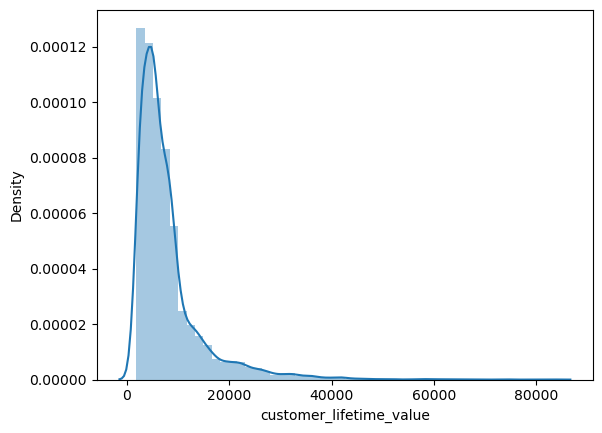

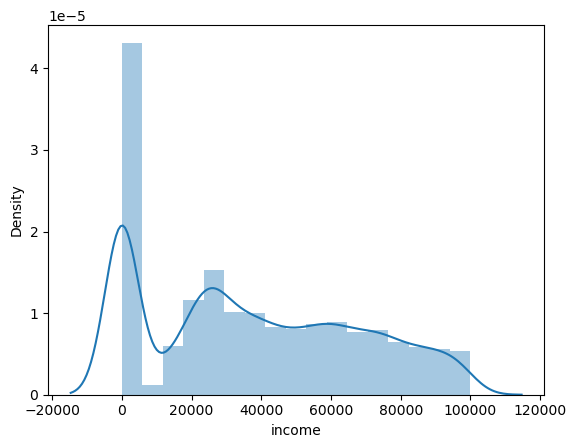

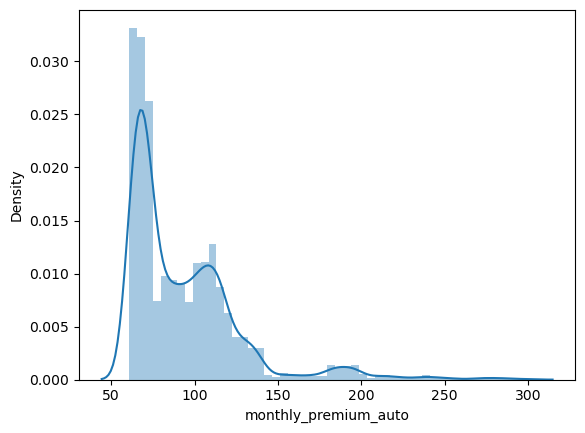

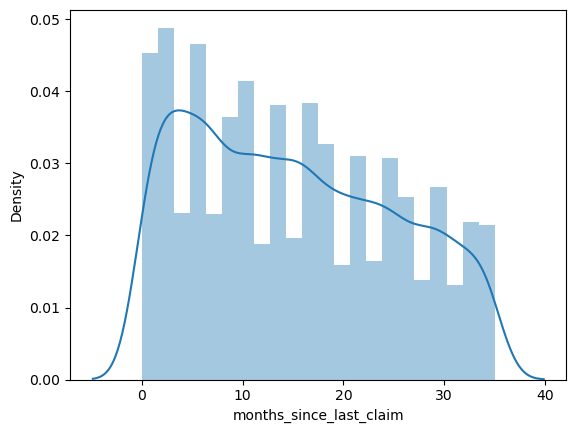

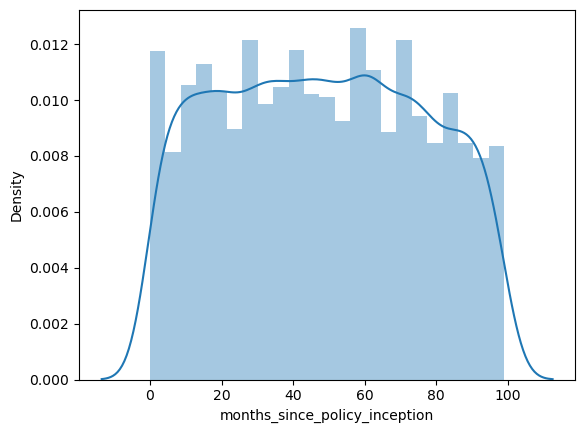

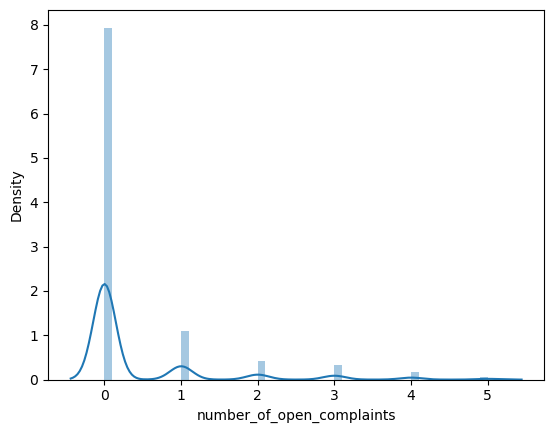

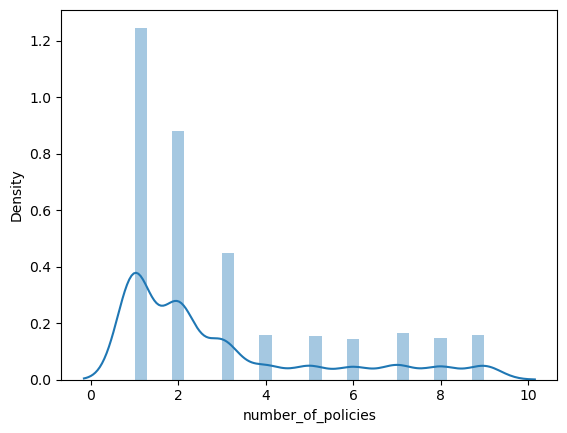

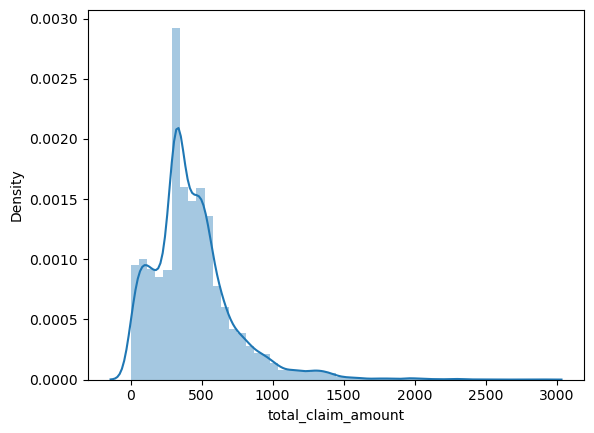

In [6]:
for column in numerical:
    sns.distplot(numerical[column])
    plt.show()

- **Customer Lifetime Value**: exponential distribution
- **Income**: tends to exponential but it doesn't exactly fit 
- **Monthly Premium Auto**: tends to exponential
- **Months Since Last Claim, Months Since Policy Inception, Number of Open Complaints, Number of Policies**: these are discrete variables, therefore their distribution can't be normal or exponential, since they are continuous
- **Total Claim Amount**: tends to a normal distribution

### 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [7]:
# drop the numerical discrete

continuous = numerical.drop(['months_since_last_claim', 'months_since_policy_inception', 
                             'number_of_open_complaints', 'number_of_policies'], axis=1)

In [8]:
continuous.head()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
customer,,,,
BU79786,2763.519279,56274,69,384.811147
QZ44356,6979.535903,0,94,1131.464935
AI49188,12887.431650,48767,108,566.472247
WW63253,7645.861827,0,106,529.881344
HB64268,2813.692575,43836,73,138.130879


In [9]:
# box-cox transformation

continuous_boxcox = continuous.copy()

def boxcox_transform(df):
    _ci = {column: None for column in df.columns}
    for column in df.columns:
        df[column] = np.where(df[column]<=0, np.NAN, df[column]) 
        df[column] = df[column].fillna(df[column].mean())
        transformed_data, ci = stats.boxcox(df[column])
        df[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci

df, _ci = boxcox_transform(continuous_boxcox)

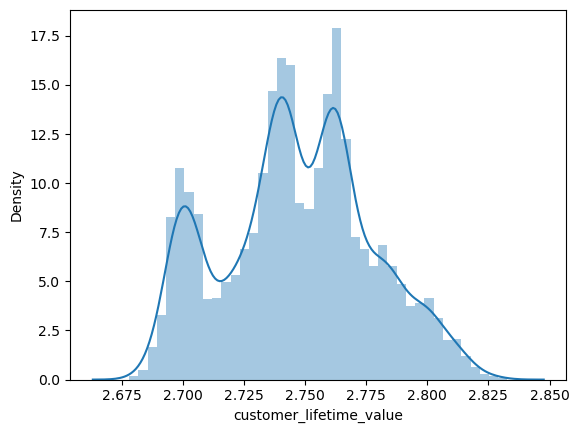

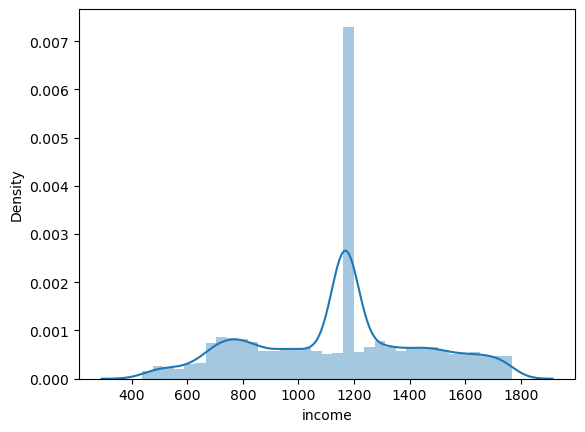

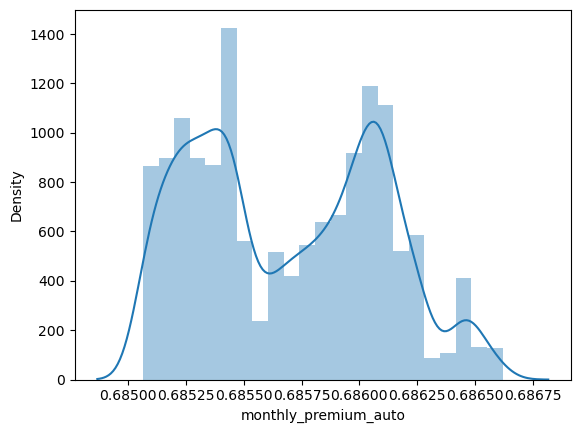

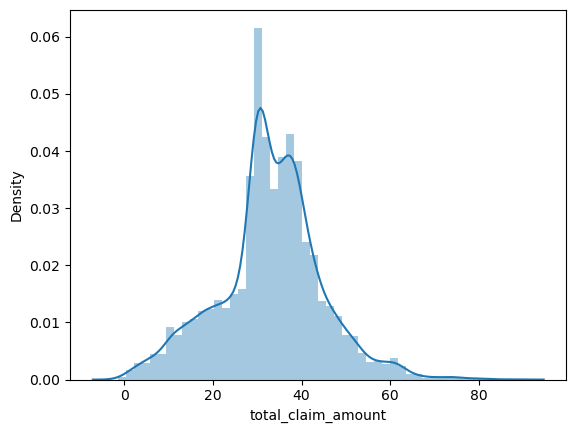

In [10]:
for column in continuous_boxcox:
    sns.distplot(continuous_boxcox[column])
    plt.show()

In [11]:
# log transformation

# here I tried to apply the transformation to the full df but I got an error 
continuous_log = continuous.apply(lambda x: np.log(x) if x > 0 else np.NAN) 

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [12]:
# then I tried to apply a function but it turns all values to "None" (question for next saturday)

In [13]:
def log_transform(df):
    for column in df.columns:
        df[column] = df[column].apply(lambda x: np.log(x) if x != 0 else np.NAN)
        df[column] = df[column].fillna(np.mean(df[column]))
    return 

In [14]:
continuous_log = log_transform(continuous)

In [15]:
print(continuous_log)

None


In [16]:
# and changes the function argument (another question for saturday)
continuous

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
customer,,,,
BU79786,7.924260,10.937988,4.234107,5.952753
QZ44356,8.850738,10.694229,4.543295,7.031268
AI49188,9.464008,10.794809,4.682131,6.339428
WW63253,8.941920,10.694229,4.663439,6.272653
HB64268,7.942253,10.688211,4.290459,4.928202
...,...,...,...,...
LA72316,10.060747,11.183602,4.290459,5.289452
PK87824,8.038031,9.980634,4.369448,5.938064
TD14365,9.007476,10.694229,4.442651,6.673026


In [17]:
def log_transform(column):
    column = column.apply(lambda x: np.log(x) if x > 0 else np.NAN)
    column = column.fillna(np.mean(column))
    return 

In [18]:
continuous_log = continuous.copy()

continuous_log["customer_lifetime_value"] = log_transform(continuous_log["customer_lifetime_value"])
continuous_log["customer_lifetime_value"]

customer
BU79786    None
QZ44356    None
AI49188    None
WW63253    None
HB64268    None
           ... 
LA72316    None
PK87824    None
TD14365    None
UP19263    None
Y167826    None
Name: customer_lifetime_value, Length: 9134, dtype: object

In [19]:
# conclusion: do it one by one

continuous = numerical.drop(['months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints',
                             'number_of_policies'], axis=1) # define again continous, since it has changed

continuous_log = continuous.copy()

continuous_log["customer_lifetime_value"] = continuous_log["customer_lifetime_value"].apply(lambda x: np.log(x) if x > 0 else np.NAN)
continuous_log["customer_lifetime_value"] = continuous_log["customer_lifetime_value"].fillna(np.mean(continuous_log["customer_lifetime_value"]))
continuous_log["customer_lifetime_value"] 

customer
BU79786     7.924260
QZ44356     8.850738
AI49188     9.464008
WW63253     8.941920
HB64268     7.942253
             ...    
LA72316    10.060747
PK87824     8.038031
TD14365     9.007476
UP19263     8.925912
Y167826     7.867809
Name: customer_lifetime_value, Length: 9134, dtype: float64

In [20]:
continuous_log["income"] = continuous_log["income"].apply(lambda x: np.log(x) if x > 0 else np.NAN)
continuous_log["income"] = continuous_log["income"].fillna(np.mean(continuous_log["income"]))

continuous_log["monthly_premium_auto"] = continuous_log["monthly_premium_auto"].apply(lambda x: np.log(x) if x > 0 else np.NAN)
continuous_log["monthly_premium_auto"] = continuous_log["monthly_premium_auto"].fillna(np.mean(continuous_log["monthly_premium_auto"]))

continuous_log["total_claim_amount"] = continuous_log["total_claim_amount"].apply(lambda x: np.log(x) if x > 0 else np.NAN)
continuous_log["total_claim_amount"] = continuous_log["total_claim_amount"].fillna(np.mean(continuous_log["total_claim_amount"]))

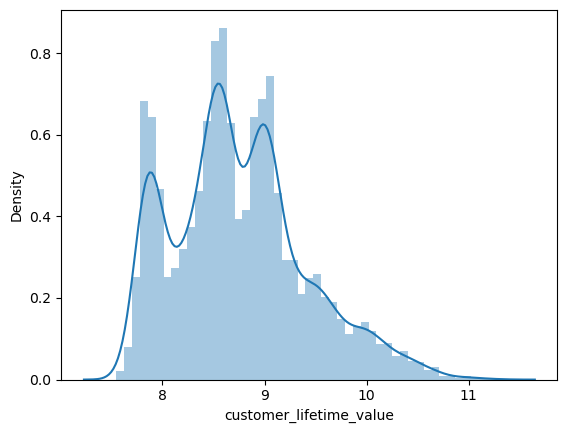

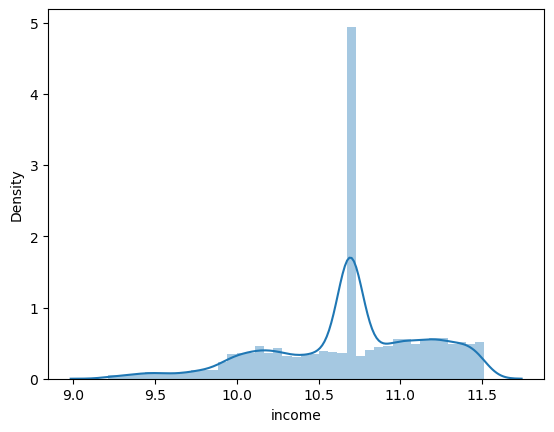

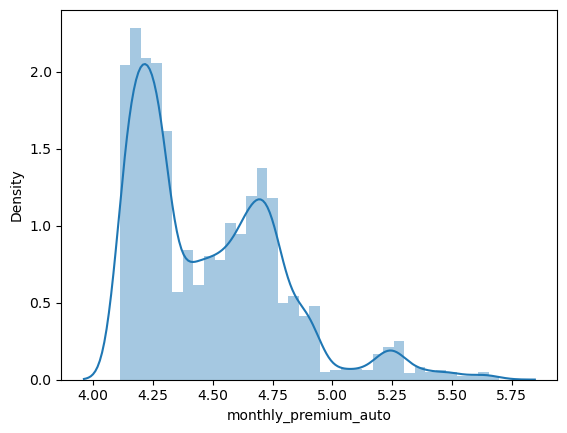

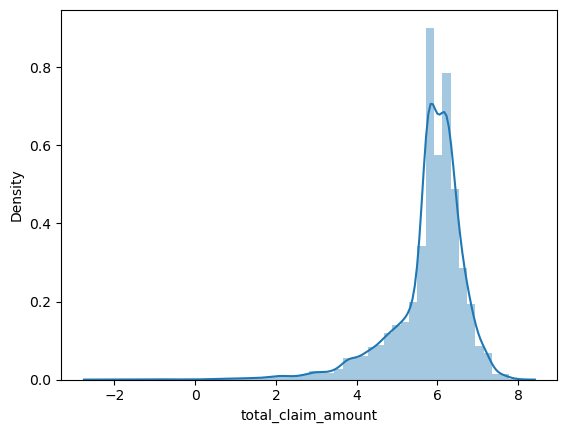

In [21]:
for column in continuous_log:
    sns.distplot(continuous_log[column])
    plt.show()

### Check the different distributions

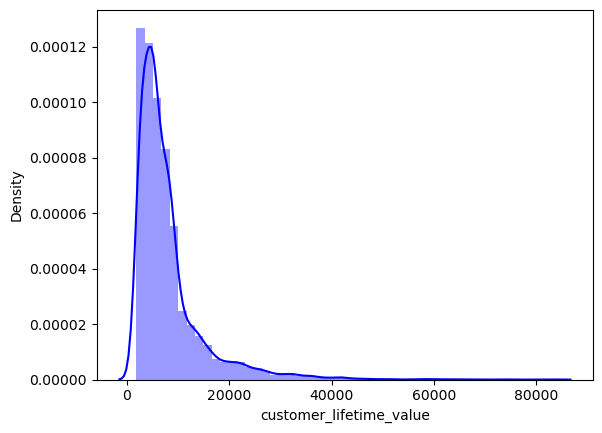

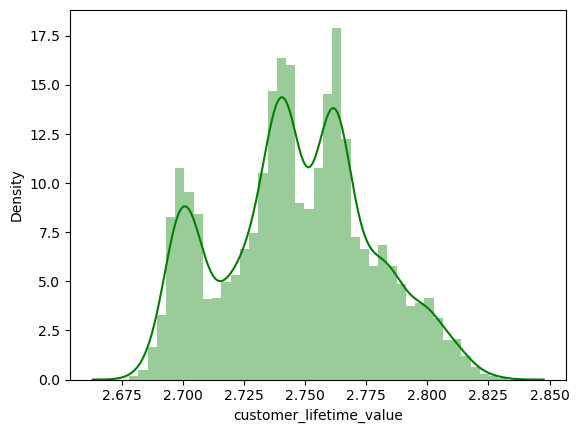

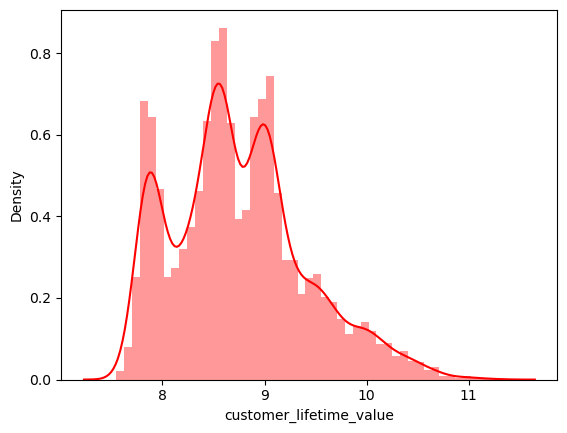

In [22]:
# customer_lifetime_value

sns.distplot(continuous["customer_lifetime_value"], color = "blue")
plt.show()
sns.distplot(continuous_boxcox["customer_lifetime_value"], color = "green")
plt.show()
sns.distplot(continuous_log["customer_lifetime_value"], color = "red")
plt.show()

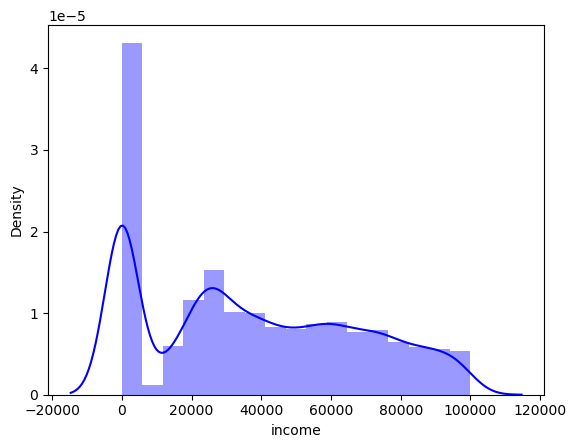

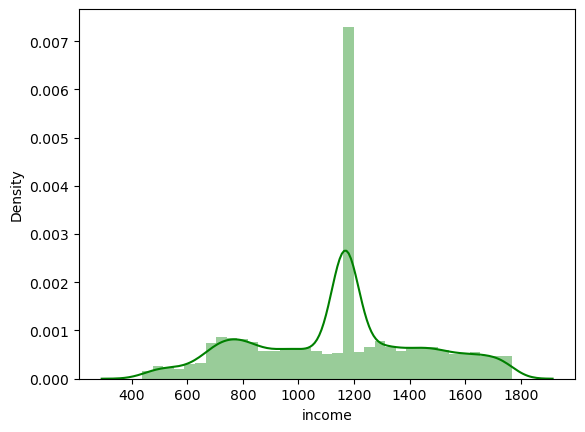

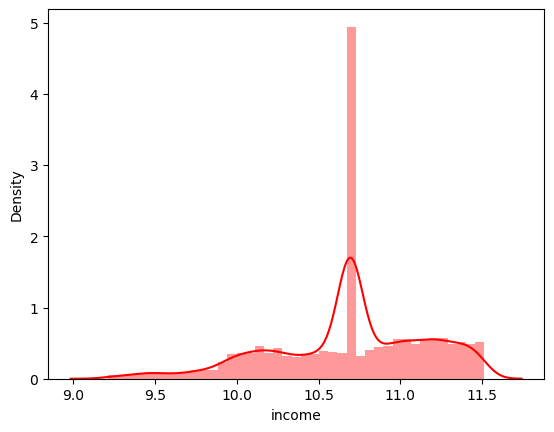

In [23]:
# income

sns.distplot(continuous["income"], color = "blue")
plt.show()
sns.distplot(continuous_boxcox["income"], color = "green")
plt.show()
sns.distplot(continuous_log["income"], color = "red")
plt.show()

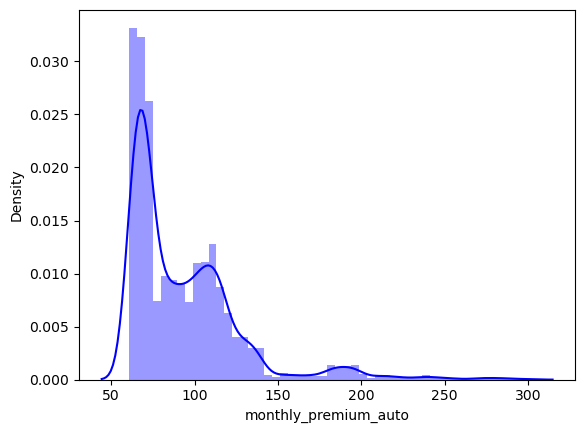

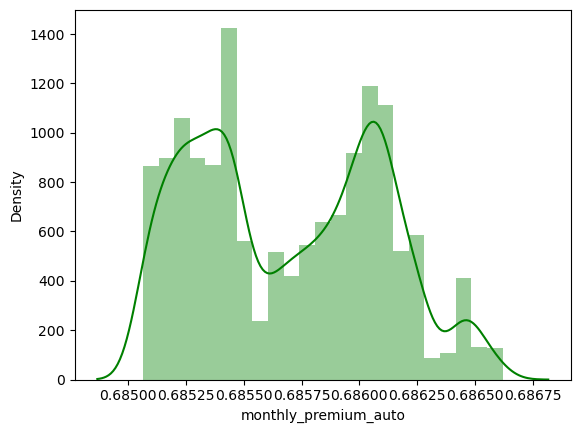

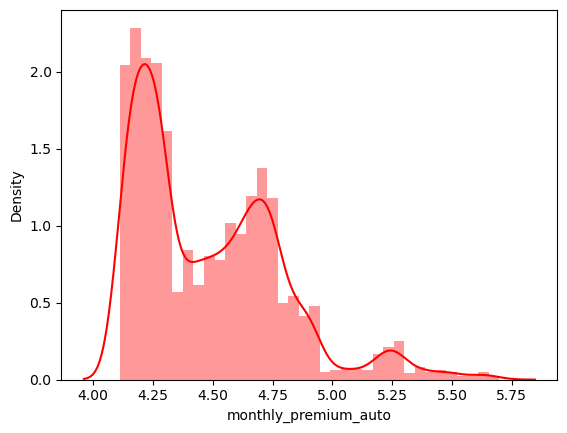

In [24]:
# monthly_premium_auto

sns.distplot(continuous["monthly_premium_auto"], color = "blue")
plt.show()
sns.distplot(continuous_boxcox["monthly_premium_auto"], color = "green")
plt.show()
sns.distplot(continuous_log["monthly_premium_auto"], color = "red")
plt.show()

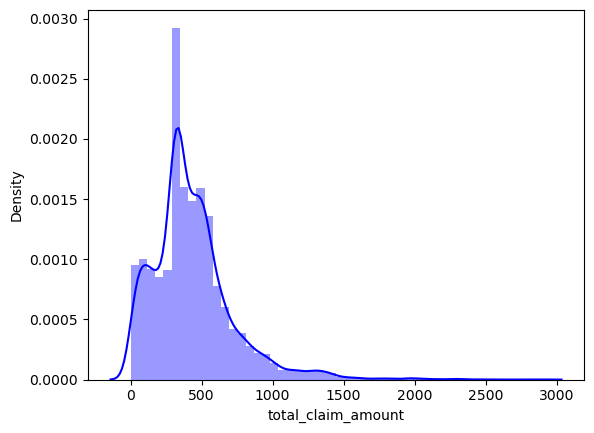

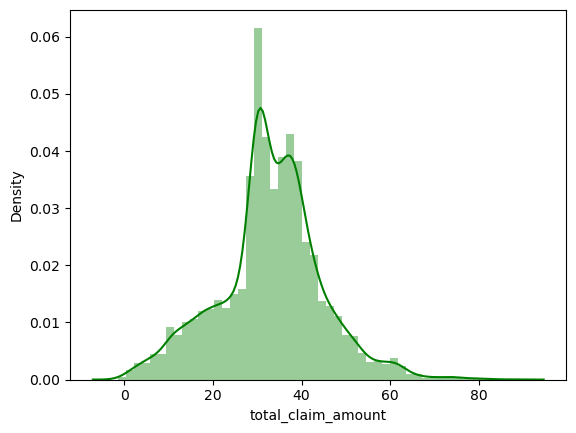

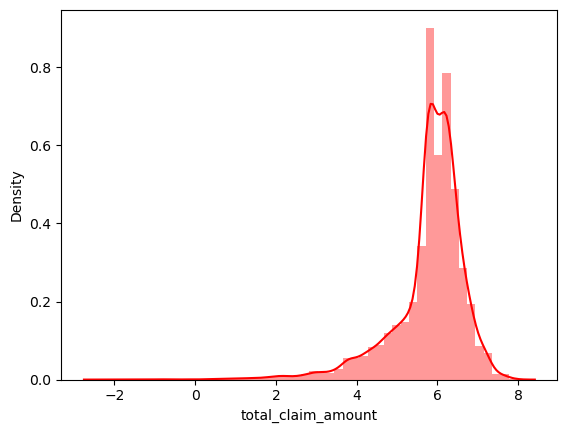

In [25]:
# total_claim_amount

sns.distplot(continuous["total_claim_amount"], color = "blue")
plt.show()
sns.distplot(continuous_boxcox["total_claim_amount"], color = "green")
plt.show()
sns.distplot(continuous_log["total_claim_amount"], color = "red")
plt.show()

### Conclusion
The boxcox and the logarithmic are used to transform the distributions to make them more normal. Therefore the best result we get is with total_claim_amount, since it already looked somehow normal in the beginning. 